# TF-2.0을 기반으로 Deep Learning Model Test

* 가이드 라인 : 아래와 같은 결과 들이 나올 수 있도록 해당하는 셀을 만들고, 좋은 성능이 나오는 모델을 찾아보세요!!!

### 필요한 패키지 불러오기..

In [1]:
# 3.4 텐서플로 2.0 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf


In [2]:
import numpy as np
import random
seed = 1234
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# 문제_1) winequality dataset을 기반으로 좋은 분류 모델을 작성하세요!!!

* 와인 데이터 불러오기 : red/white

In [45]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head(2))
print(white.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  

* 각기 red =0, white =1 로 변환하기 + type컬럼에 작성하기 --> red set + white set합쳐서 하나의 wine 이라는 데이터 셋 완성!!!

In [46]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

* 정규화 수행 + random하게 train/test로 할 것들에 대한 인덱스 처리

In [47]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

In [48]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1,random_state=1234)
print(wine_shuffle.head(2))
wine_np = wine_shuffle.to_numpy()
print(wine_np[:2])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3543       0.181818          0.166667     0.120482        0.018405   0.036545   
2252       0.280992          0.140000     0.120482        0.108896   0.061462   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3543             0.166667              0.352535  0.092346  0.534884   
2252             0.173611              0.387097  0.167920  0.341085   

      sulphates   alcohol   quality  type  
3543   0.174157  0.434783  0.500000   1.0  
2252   0.168539  0.217391  0.333333   1.0  
[[0.18181818 0.16666667 0.12048193 0.01840491 0.03654485 0.16666667
  0.35253456 0.09234625 0.53488372 0.1741573  0.43478261 0.5
  1.        ]
 [0.28099174 0.14       0.12048193 0.10889571 0.06146179 0.17361111
  0.38709677 0.1679198  0.34108527 0.16853933 0.2173913  0.33333333
  1.        ]]


* 그 값을 기준으로 80프로는 train으로 남은 20프로는 test로

In [49]:
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

In [15]:
train_X.shape

(5197, 12)

In [21]:
train_Y.shape

(5197, 2)

In [50]:
#test_Y => one-hot encoding
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)

### 문제 1- 1) 위의 데이터를 바탕으로 아래 주어진 조건의 DNN의 모델을 만들고, 수행하세요!!! 
 - 조건1 : 모델 구조 : 입력 레이어 + 히든1층(노드 24, activation = relu) + 히든 2층(노드 12, activation=relu) + 아웃풋 레이어
 - 조건2: loss = "categorical_crossentropy", metrics = ["accuracy],optimizer=tf.keras.optimizers.Adam(lr=0.07)를 바탕으로 최적화를 수행하세요..
 - 조건3 :model.evaluate(test_X, test_Y,verbose=2) 을 수행해서 test_X 에 대한 결과를 나타내세요!!!
 - 주의 사항 : (단, train_X, test_X)는 그대로 유지를 해야, 다른 분들과 동일한 평가를 수행할 수 있습니다!!
 - 주의 사항 : DNN을 할 때의 y의 값이 어떻게 되어야 하는지 잘 고민을 해야할 것입니다!!!

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=12, activation='relu'),
    
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 26        
Total params: 638
Trainable params: 638
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit()

Train on 3897 samples, validate on 1300 samples
Epoch 1/20
3897/3897 [==============================] - 2s 515us/sample - loss: 0.1353 - accuracy: 0.9512 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 2/20
3897/3897 [==============================] - 1s 158us/sample - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0417 - val_accuracy: 0.9915
Epoch 3/20
3897/3897 [==============================] - 1s 162us/sample - loss: 0.0500 - accuracy: 0.9859 - val_loss: 0.0533 - val_accuracy: 0.9838
Epoch 4/20
3897/3897 [==============================] - 1s 164us/sample - loss: 0.0506 - accuracy: 0.9861 - val_loss: 0.0378 - val_accuracy: 0.9915
Epoch 5/20
3897/3897 [==============================] - 1s 163us/sample - loss: 0.0398 - accuracy: 0.9902 - val_loss: 0.0347 - val_accuracy: 0.9915
Epoch 6/20
3897/3897 [==============================] - 1s 164us/sample - loss: 0.0416 - accuracy: 0.9882 - val_loss: 0.0318 - val_accuracy: 0.9931
Epoch 7/20
3897/3897 [==============================] - 1s 164us

In [25]:
history = model.fit(train_X, train_Y, epochs=20, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/20
3897/3897 [==============================] - 1s 176us/sample - loss: 0.1285 - accuracy: 0.9523 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 2/20
3897/3897 [==============================] - 0s 41us/sample - loss: 0.0651 - accuracy: 0.9815 - val_loss: 0.0516 - val_accuracy: 0.9931
Epoch 3/20
3897/3897 [==============================] - 0s 43us/sample - loss: 0.0593 - accuracy: 0.9831 - val_loss: 0.0643 - val_accuracy: 0.9800
Epoch 4/20
3897/3897 [==============================] - 0s 47us/sample - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0338 - val_accuracy: 0.9923
Epoch 5/20
3897/3897 [==============================] - 0s 47us/sample - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 6/20
3897/3897 [==============================] - 0s 47us/sample - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0328 - val_accuracy: 0.9923
Epoch 7/20
3897/3897 [==============================] - 0s 49us/sampl

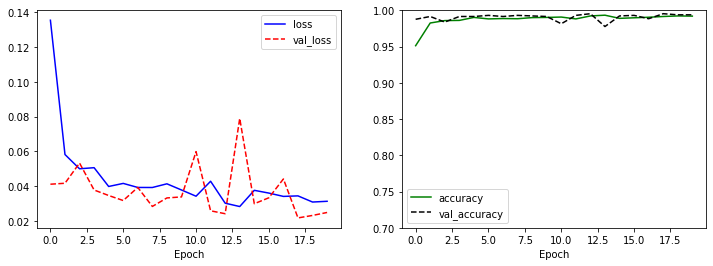

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [40]:
model.evaluate(test_X, test_Y,verbose=2)

1300/1 - 0s - loss: 0.0153 - accuracy: 0.9892


[0.026162641578568863, 0.98923075]

In [26]:
# 추가 테스트한 결과
model.evaluate(test_X, test_Y,verbose=2)

1300/1 - 0s - loss: 0.0121 - accuracy: 0.9946


[0.02275209672247561, 0.9946154]

### 문제 1- 2)  위에서 작성한 것보다 보다 좋은 개선된 모델을 만들어 보세요!!![ 목표 : 0.99 accuracy 이상]
 - 단, DNN 구조의 모델을 기본으로 하고, 다른  ML알고리즘이 아닌  DNN의 구조를 바탕으로 다양한 모델을 만들어서  좋은 모델을 찾아보세요.
 - model.evaluate(test_X, test_Y,verbose=2) 위와 동일하게 한 결과에 대해서 개선된 부분을 찾아보시길 바랍니다.

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu')
    
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),  loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=20, batch_size=32, validation_split=0.25)
model.evaluate(test_X, test_Y,verbose=2)

Train on 3897 samples, validate on 1300 samples
Epoch 1/20
3897/3897 [==============================] - 2s 602us/sample - loss: 0.1142 - accuracy: 0.9625 - val_loss: 0.0808 - val_accuracy: 0.9769
Epoch 2/20
3897/3897 [==============================] - 1s 218us/sample - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0880 - val_accuracy: 0.9846
Epoch 3/20
3897/3897 [==============================] - 1s 221us/sample - loss: 0.0869 - accuracy: 0.9749 - val_loss: 0.1194 - val_accuracy: 0.9662
Epoch 4/20
3897/3897 [==============================] - 1s 225us/sample - loss: 0.0720 - accuracy: 0.9790 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 5/20
3897/3897 [==============================] - 1s 224us/sample - loss: 0.0469 - accuracy: 0.9877 - val_loss: 0.0323 - val_accuracy: 0.9915
Epoch 6/20
3897/3897 [==============================] - 1s 247us/sample - loss: 0.0363 - accuracy: 0.9910 - val_loss: 0.0298 - val_accuracy: 0.9931
Epoch 7/20
3897/3897 [==============================] - 1s 233us

[0.02343915577691335, 0.9930769]

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),  loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=19, batch_size=32, validation_split=0.25)
model.evaluate(test_X, test_Y,verbose=2)

Train on 3897 samples, validate on 1300 samples
Epoch 1/19
3897/3897 [==============================] - 1s 168us/sample - loss: 0.1405 - accuracy: 0.9479 - val_loss: 0.1259 - val_accuracy: 0.9638
Epoch 2/19
3897/3897 [==============================] - 0s 45us/sample - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.0516 - val_accuracy: 0.9923
Epoch 3/19
3897/3897 [==============================] - 0s 47us/sample - loss: 0.0721 - accuracy: 0.9815 - val_loss: 0.0330 - val_accuracy: 0.9938
Epoch 4/19
3897/3897 [==============================] - 0s 48us/sample - loss: 0.0563 - accuracy: 0.9854 - val_loss: 0.0354 - val_accuracy: 0.9915
Epoch 5/19
3897/3897 [==============================] - 0s 47us/sample - loss: 0.0452 - accuracy: 0.9890 - val_loss: 0.0398 - val_accuracy: 0.9908
Epoch 6/19
3897/3897 [==============================] - 0s 48us/sample - loss: 0.0518 - accuracy: 0.9882 - val_loss: 0.0395 - val_accuracy: 0.9946
Epoch 7/19
3897/3897 [==============================] - 0s 49us/sampl

[0.018296551334743318, 0.99615383]

# 문제_ 2) Fashion_MNIST 데이터를 활용한 CNN모델을 만들기

* 데이터 불러오기

In [56]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

* train_X, test_X의 모양 변경 : 28 by 28 and 1 channel

In [58]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

* target label 설명   
 - 0 : 티셔츠/상의
 - 1 : 바지
 - 2 :스웨터
 - 3 :드레스
 - 4 :코트
 - 5 : 샌들
 - 6 : 셔츠
 - 7 : 운동화
 - 8 : 가방
 - 9 : 부츠

* 참고로 실제 데이터 확인

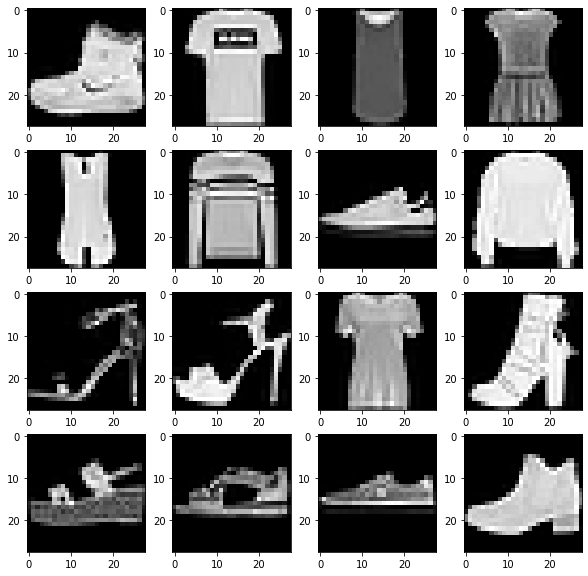

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

### 문제 2- 1)  CNN 모델을 활용하여 분류 모델을 완성하세요..
 - 조건 : 
     - 입력 레이어
     - conv1 layer : 3by3의 커널로 Conv2D, 필터 수 16개
     - conv2 layer : 3by3 의 커널로 Conv2D, 필터 수 : 32개
     - Neural Network : node : 128개, activation : relu
     - 출력 레이터
     - 컴파일 조건 : loss = "sparse_categorical_crossentropy", metrics=["accuracy"],optimizer=tf.keras.optimizers.Adam()를 기반으로 할 것..
 - 조건 : model.evaluate(test_X, test_Y, verbose=0)에 대한 출력 확인
 - 조건 : 학습은 train_X, train_Y 사용

In [21]:
model = tf.keras.Sequential([
~~~
])

model.compile(optimizer=tf.keras.optimizers.Adam(),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(~~~)
model.evaluate(test_X, test_Y, verbose=0)

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 149s 3ms/sample - loss: 0.4554 - accuracy: 0.8365 - val_loss: 0.3718 - val_accuracy: 0.8648
Epoch 2/3
45000/45000 [==============================] - 149s 3ms/sample - loss: 0.3213 - accuracy: 0.8827 - val_loss: 0.3402 - val_accuracy: 0.8771
Epoch 3/3
45000/45000 [==============================] - 138s 3ms/sample - loss: 0.2600 - accuracy: 0.9036 - val_loss: 0.3563 - val_accuracy: 0.8727


[0.3792726293206215, 0.8683]

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    # 평탄화
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
    
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X,train_Y, epochs=10, validation_split=0.25)
model.evaluate(test_X, test_Y, verbose=0)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 20s 442us/sample - loss: 0.4512 - accuracy: 0.8398 - val_loss: 0.3814 - val_accuracy: 0.8620
Epoch 2/10
45000/45000 [==============================] - 20s 434us/sample - loss: 0.3172 - accuracy: 0.8842 - val_loss: 0.3453 - val_accuracy: 0.8765
Epoch 3/10
45000/45000 [==============================] - 20s 439us/sample - loss: 0.2578 - accuracy: 0.9047 - val_loss: 0.3734 - val_accuracy: 0.8689
Epoch 4/10
45000/45000 [==============================] - 21s 456us/sample - loss: 0.2094 - accuracy: 0.9226 - val_loss: 0.3791 - val_accuracy: 0.8759
Epoch 5/10
45000/45000 [==============================] - 20s 451us/sample - loss: 0.1747 - accuracy: 0.9357 - val_loss: 0.4333 - val_accuracy: 0.8732
Epoch 6/10
45000/45000 [==============================] - 20s 447us/sample - loss: 0.1463 - accuracy: 0.9467 - val_loss: 0.4912 - val_accuracy: 0.8663
Epoch 7/10
45000/45000 [====================

[0.7003964703723788, 0.8653]

* 위에서 학습한 것을 확인하는 용도 코드

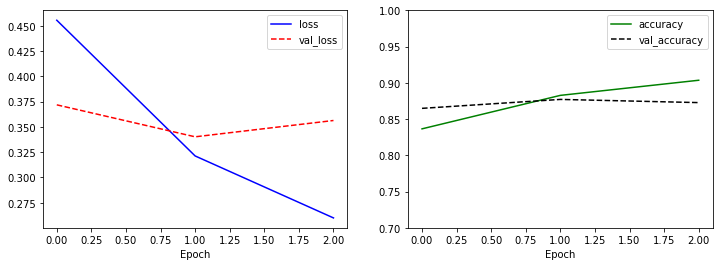

[0.3792726293206215, 0.8683]

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

### 문제 2- 2)  위에서 작성한 것보다 보다 좋은 개선된 모델을 만들어 보세요!!! [목표 : accuracy 0.91이상]
 - 단, CNN 구조의 모델을 기본으로 하고, 위의 것 보다 좋은 모델을 만들어 보세요!!!
 - 다양한 방식을 활용해서 레이어 구조 변경, 다른 모델 차용 등....
 - model.evaluate(test_X, test_Y,verbose=0) 위와 동일하게 한 결과에 대해서 개선된 부분을 찾아보시길 바랍니다.

In [23]:
# 하나의 예시....
model = tf.keras.Sequential([
   ~~~~~~~
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(~~~~)
model.evaluate(test_X, test_Y, verbose=0)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 1063s 24ms/sample - loss: 0.5920 - accuracy: 0.7839 - val_loss: 0.3281 - val_accuracy: 0.8767
Epoch 2/10
45000/45000 [==============================] - 1058s 24ms/sample - loss: 0.3684 - accuracy: 0.8663 - val_loss: 0.2764 - val_accuracy: 0.8945
Epoch 3/10
45000/45000 [==============================] - 1073s 24ms/sample - loss: 0.3258 - accuracy: 0.8840 - val_loss: 0.2542 - val_accuracy: 0.9078
Epoch 4/10
45000/45000 [==============================] - 1055s 23ms/sample - loss: 0.3048 - accuracy: 0.8921 - val_loss: 0.2439 - val_accuracy: 0.9110
Epoch 5/10
45000/45000 [==============================] - 1059s 24ms/sample - loss: 0.2891 - accuracy: 0.8964 - val_loss: 0.2272 - val_accuracy: 0.9148
Epoch 6/10
45000/45000 [==============================] - 1067s 24ms/sample - loss: 0.2771 - accuracy: 0.9018 - val_loss: 0.2410 - val_accuracy: 0.9109
Epoch 7/10
45000/45000 [==============

[0.2362356955766678, 0.9152]

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10, activation='softmax')
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X,train_Y, epochs=10, validation_split=0.25)
model.evaluate(test_X, test_Y, verbose=0)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 16s 351us/sample - loss: 0.4905 - accuracy: 0.8217 - val_loss: 0.3574 - val_accuracy: 0.8687
Epoch 2/10
45000/45000 [==============================] - 18s 401us/sample - loss: 0.3334 - accuracy: 0.8802 - val_loss: 0.3165 - val_accuracy: 0.8873
Epoch 3/10
45000/45000 [==============================] - 17s 386us/sample - loss: 0.2910 - accuracy: 0.8933 - val_loss: 0.2973 - val_accuracy: 0.8896
Epoch 4/10
45000/45000 [==============================] - 18s 407us/sample - loss: 0.2600 - accuracy: 0.9050 - val_loss: 0.2900 - val_accuracy: 0.8949
Epoch 5/10
45000/45000 [==============================] - 18s 409us/sample - loss: 0.2364 - accuracy: 0.9121 - val_loss: 0.2954 - val_accuracy: 0.8965
Epoch 6/10
45000/45000 [==============================] - 18s 391us/sample - loss: 0.2161 - accuracy: 0.9218 - val_loss: 0.2935 - val_accuracy: 0.9023
Epoch 7/10
45000/45000 [====================

[0.34302712769508364, 0.8966]

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X,train_Y, epochs=10, validation_split=0.25)
model.evaluate(test_X, test_Y, verbose=0)

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 202s 4ms/sample - loss: 0.5997 - accuracy: 0.7834 - val_loss: 0.3336 - val_accuracy: 0.8738
Epoch 2/10
45000/45000 [==============================] - 203s 5ms/sample - loss: 0.3766 - accuracy: 0.8644 - val_loss: 0.2720 - val_accuracy: 0.8953
Epoch 3/10
45000/45000 [==============================] - 203s 5ms/sample - loss: 0.3265 - accuracy: 0.8820 - val_loss: 0.2609 - val_accuracy: 0.9044
Epoch 4/10
45000/45000 [==============================] - 202s 4ms/sample - loss: 0.3058 - accuracy: 0.8905 - val_loss: 0.2599 - val_accuracy: 0.9018
Epoch 5/10
45000/45000 [==============================] - 203s 5ms/sample - loss: 0.2894 - accuracy: 0.8969 - val_loss: 0.2273 - val_accuracy: 0.9185
Epoch 6/10
45000/45000 [==============================] - 202s 4ms/sample - loss: 0.2783 - accuracy: 0.8998 - val_loss: 0.2245 - val_accuracy: 0.9150
Epoch 7/10
45000/45000 [==========================

[0.23159233043193816, 0.9156]

# 문제3) 수업 중에 다루었던 Titanic data 을 활용하여 생존 여부를 예측하는 모델을 작성하세요!!!

* 필요 패키지들

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 문제 3-1) 아래의 titanic_train.csv를 불러오고, .head(3)을 통해서 데이터를 확인하세요!!

In [53]:
df = pd.read_csv('titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 참고 : 데이터 항목 설명
 - surveved : 생존여부(0/1),   
 - Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..),    
 - n ame : 승객이름,    
 - sex : 승객성별,      
 - Age : 승객나이,    
 - SibSp : 함께 탑승한 형재와 배우자의 수,      
 - parch : 함께 탑승한 부모, 아이의 수,       
 - ticket: 티켓번호,      
 - Fare: 탑승료,      
 - cabin : 객실번호,       
 - embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)

#### outlier 제거를 위한 부분 --> 2칼럼 초과하여 3칼럼 모두 이상치인 데이터는 제거를 하기 위한 부분

In [54]:
from collections import Counter
# by ) Tukey method (Tukey JW., 1977) 을 사용을 하고, 수치 데이터 아웃라이어가 2개 이상 발생 시 해당 데이터를 제거하기 위한 작업 중
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [55]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [56]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


* 아래와 같이 빵구난 데이터를 확인하세요!

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

### 문제 3_2) Embarked의 빠진 2개의 데이터를 "S"의 문자열 값으로 채우세요!! --> 그리고 제대로 채워졌는지 확인하세요!!!

In [64]:
########## 수정한 코드

df["Embarked"] = df.Embarked.apply(lambda x : x if x is not None else 'S')

In [65]:
df["Embarked"] .value_counts(dropna=False)

S    636
C    168
Q     77
Name: Embarked, dtype: int64

* 나이에 대한 빠진 값을 --> SibSp / Parch / Pclass의 값이 같으면 그 데이터들을 모아서 중간값으로 예측, 아니면 나이 데이터 중에서 단순 중간값으로 채우기!!

In [67]:
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

age_idx = df.columns.get_loc("Age")
SibSp_idx = df.columns.get_loc("SibSp")
Parch_idx = df.columns.get_loc("Parch")
Pclass_idx = df.columns.get_loc("Pclass")

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) 
                             & (df['Parch'] == df.iloc[i]["Parch"]) & 
                             (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df.iat[i, age_idx] = age_pred
    else :
        df.iat[i, age_idx]  = age_med

### 문제3_3) 아래와 같이 Cabin의 컬럼에 대해서 빠진 680데이터에는  "X"라는 문자열의 값으로 채우고, 맨 앞의 1글자만으로 객실을 단순화 하세요!!! (아래 결과표 참고)

In [68]:
df["Cabin"] .value_counts(dropna=False)

NaN        680
B96 B98      4
G6           4
F2           3
C22 C26      3
          ... 
A14          1
C54          1
D10 D12      1
C86          1
D50          1
Name: Cabin, Length: 148, dtype: int64

In [69]:
####### 수정한 코드

df.Cabin = df.Cabin.apply(lambda x : str(x)[0] if x is not None else 'X')

df["Cabin"].value_counts(dropna=False)

X    680
C     56
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

* 전체적으로 우선은 빠진 데이터가 없는지 확인!!

In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

* 기본적인 일괄적인 전처리 예정   
 - 수행 1 : "PassengerId", "Name", "Ticket" 컬럼 삭제   
 - 수행 2: "Cabin", "Sex", "Embarked" 컬럼 인코더 수행

In [66]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [70]:
#
def drop_feature(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

In [71]:
def format_features(df):
    # 변경할 컬럼 리스트    
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        # 각기 컬럼별로 수행할 인코더 설정 -> 컬럼 별로 다르게 되니 매 for 마다 새로운 것이 불러올 것!!
        le = preprocessing.LabelEncoder()
        # 인코딩할 컬럼 설절 및 그에 맞는 학습 수행 -> fit
        le = le.fit(df.loc[:,feature])
        # 실제 학습한 내용을 적용!!!! -> transform
        df.loc[:, feature] = le.transform(df.loc[:, feature])
    
    
    # Scalar  사용할 수 있음!!!!

    return df  

In [73]:
def titanic_transform(df):
    df = drop_feature(df)
    df = format_features(df)
    return df

In [74]:
X_titanic_train = titanic_transform(df)
X_titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2


In [75]:
y_titanic_train = X_titanic_train.iloc[:,0]
X_titanic_train =X_titanic_train.iloc[:,1:]

* 데이터 분리

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, 
                                                    y_titanic_train, 
                                                    stratify = y_titanic_train,
                                                    test_size=0.3, 
                                                    random_state=1234)

* 참고) 우리의 비교 모델!!! Random Forest의 정확도 0.81

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [102]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=1234)
rf_clf.fit(X_train,y_train)

rfc_predictions = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, rfc_predictions)
print("Random Forest 의 Test Accuracy Result  : {0: .4f}".format(accuracy))

Random Forest 의 Test Accuracy Result  :  0.8151


### 문제3_4) 비교 모델 Random Forest의 정확도 0.815보다 높은 DNN 모델을 만들어서 타이타닉의 생존을 예측하는 분류 모델을 만드세요!!(DNN모델 이외의 제약 조건은 없음!!!!)

265/1 - 0s - loss: 0.5296 - accuracy: 0.8302


[0.39467792960832704, 0.8301887]

265/1 - 0s - loss: 0.5289 - accuracy: 0.8264


[0.41572618574466347, 0.8264151]

265/1 - 1s - loss: 0.5478 - accuracy: 0.8377


[0.41806211651496167, 0.83773583]

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=24, activation='relu', input_shape=(???,)),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

SyntaxError: invalid syntax (<ipython-input-73-364c473a8b74>, line 2)